# **Percepton for binary classification**

**Disclaimer**: large parts of the lab are taken from [this webpage](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/).

A percepton is the simplest structure for a Neural Net. It consists in a _input layer_ (only one) and a one dimensional _output layer_ (only one). Works quite well to linear classification problem.
If the input layer has dimension $n$, as below,

<img src="./Images/Percepton_1.png"
 style="float:center;" align="center">


the Neural Net predicts the output as the summation of the input
$$
\sigma(w_0 + \sum_i^{n}w_i x_i).
$$
Where $\sigma$ is the activation function (that gives the non linear part), and $w_0$ is the bais.

When dealing with a two-dimensional input as the following structure

<img src="./Images/Percepton_2.png"
 style="float:center;">
 
everything gets simple and the formula is
$$
\sigma(w_0 + w_1x_1 + w_2x_2).
$$
Geometrically we define a line and with $\sigma$ the line is shifted in a non linear way.

In case of *binary classification*, we can define $\sigma$ as

$$
\sigma = 
\begin{cases}
1 & \text{ if }  w_0 + w_1x_1 + w_2x_2 \geq 0, \\
0 & \text{ otherwise}.
\end{cases}
$$
The risult is in relation to where is my position wrt the line $w_0 + w_1x_1 + w_2x_2$.

Let us do that!

In [1]:
# My prediction
def predict(x, w, w0):
    sigma = w0 + x[0]*w[0] + x[1]*w[1]
    return 1.0 if sigma >= 0.0 else 0.0

Now we focus on the following ``dataset``. The first entry is the $x$ coordinate, the second the $y$ coordinate and the third entry is the classification tag.

We plot the data.

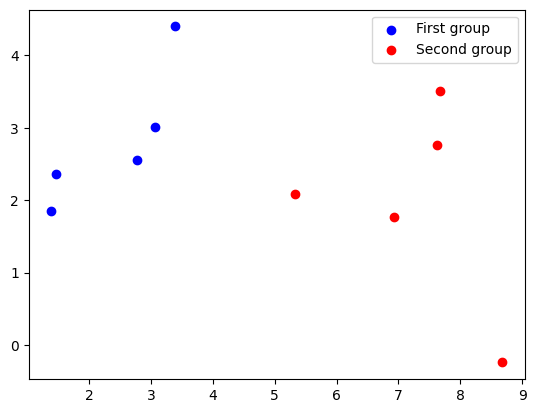

[7.673756466, 3.508563011, 1]


In [3]:
# ramdom data --> preparation of the dataset

# x, y, label
# 1 == red
# 0 == blue
dataset = [[2.7810836,2.550537003,0],
 [1.465489372,2.362125076,0],
 [3.396561688,4.400293529,0],
 [1.38807019,1.850220317,0],
 [3.06407232,3.005305973,0],
 [7.627531214,2.759262235,1],
 [5.332441248,2.088626775,1],
 [6.922596716,1.77106367,1],
 [8.675418651,-0.242068655,1],
 [7.673756466,3.508563011,1]]

# plotting data
import matplotlib.pyplot as plt
import numpy as np

x1 = []
y1 = []
x2 = []
y2 = []

# For the plot
for row in dataset:
    if row[-1] == 0:
        x1.append(row[0])
        y1.append(row[1])
    else:
        x2.append(row[0])
        y2.append(row[1])
    
plt.scatter(x1, y1, c ="blue", label="First group")
plt.scatter(x2, y2, c ="red",label="Second group")
plt.legend()

# To show the plot
plt.show()

print(dataset[-1])
# weights = [-0.1, 0.20653640140000007, -0.23418117710000003]  #### this are the ones related to the dataset

# AIM: I want to separete the blue and red dot

In [6]:
# Backpropagation --> define the weights, using gradient descent method
def train_weights(train, l_rate, n_epoch): # l_rate = alpha, n_epoch = k in the for loop
    input_dim = len(train[0]) - 1 # One dimensional input here
    weights = [0.0 for i in range(input_dim)]
    bias = 0.0
    sum_error = 0.0
    for epoch in range(n_epoch):
        # sum_error = 0.0
        for x in train:
            prediction = predict(x, weights,bias) # The function that predict the output of the net
            print(prediction) # What I predicted
            print(x[-1], "x-1") # The real label of the data
            error = (x[-1] - prediction) # 0 or 1
            sum_error += error**2
            bias = bias + l_rate * error # Doing optimization on the loss function that we want to minimize
            # The loss function is the square of the error
            # We have to go to the direction of the gradient with the magituded gives from alpha (learning_rate)
            
            for i in range(len(x)-1):
                weights[i] = weights[i] + l_rate * error * x[i] # Apply the chain rule to compute the gradient
    
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return bias, weights

In [7]:
# Calculate weights

l_rate = 0.1
n_epoch = 5
bias, weights = train_weights(dataset, l_rate, n_epoch)
print(f"weights: {weights}")
print(f"bias: {bias}")

1.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
0.0
0 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
1.0
1 x-1
>epoch=4, lrate=0.100, error=3.000
weights: [0.20653640140000007, -0.23418117710000003]
bias: -0.1


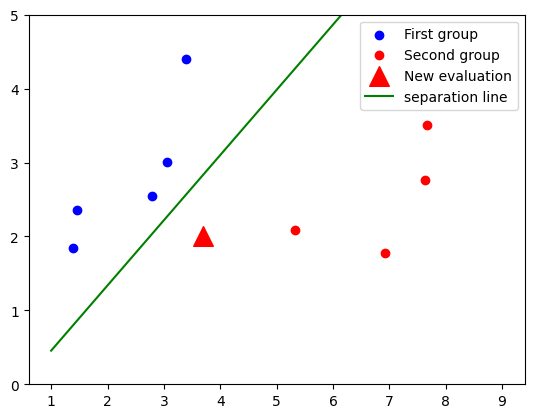

In [8]:
#### point ####
# New point to predict the label
x = 3.7
y = 2.

#### plot the separation line ###
xx = np.linspace(1,9,50)
yy = (-xx*weights[0] - bias)/weights[1] 


prediction = predict([x,y],weights, bias)

if prediction == 1:
    color = "red"
else:
    color = "blue"
### plot the new point ####

plt.scatter(x1, y1, c = "blue", label="First group")
plt.scatter(x2, y2, c = "red",label="Second group")
plt.scatter(x, y, 200, c = color ,marker="^",label="New evaluation")
plt.plot(xx, yy, label="separation line", c="green") # The line that the net found
plt.ylim([0,5])
plt.legend()
 
# To show the plot
plt.show()